# Lista prática I

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynp

## Vizinhos mais próximos

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

In [1]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))

In [2]:
# Método do k-NN
def knn(X_train, y_train, X_test, k):
    # Matrizes que compõem o cálculo matricial das distâncias entre os pontos de treino e teste
    aux1 = np.diag(X_train @ X_train.T).reshape(-1, 1) @ np.ones(X_test.shape[0]).reshape(1, -1)
    aux2 = -2 * X_train @ X_test.T
    aux3 = np.ones(X_train.shape[0]).reshape(-1, 1) @ np.diag(X_test @ X_test.T).reshape(1, -1)
    
    # Calculando a matriz de distâncias
    # O elemento (i, j) dessa matriz é a distância euclidiana entre o i-ésimo ponto do treino e
    # o j-ésimo ponto do teste, de modo que cada coluna é o vetor de distâncias do j-ésimo
    # ponto de teste a todos os pontos de treino
    distances = np.sqrt(aux1 + aux2 + aux3)

    # Encontrando a vizinhança de cada ponto de teste
    neighbors = np.argsort(distances, axis = 0)[:k, :]
    # Pegando os rótulos desses vizinhos
    neighbors_labels = y_train[neighbors]
    # Calculando as predições dos pontos de teste como a moda dos rótulos de cada vizinhança
    y_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis = 0, arr = neighbors_labels)

    return y_pred

In [3]:
# Número de pontos de teste
n_of_test_points = mnist.labels_test.shape[0]
# Salvando o melhor número de vizinhos
best_k = 0
# Salvando a melhor acurácia
best_accuracy = 0
# Salvando as melhores predições
best_y_pred = None

# Para cada número de vizinhos...
for k in range(1, 11):
    # Calcula as predições para o conjunto de teste
    y_pred = knn(mnist.features_train, mnist.labels_train, mnist.features_test, k)
    # Calcula a acurácia
    accuracy = np.sum(y_pred == mnist.labels_test)/n_of_test_points
    print("Número de vizinhos:", k, "; Acurácia:", accuracy)
    # Se for a melhor acurácia até agora, salva as variáveis
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_y_pred = y_pred

Número de vizinhos: 1 ; Acurácia: 0.9822222222222222
Número de vizinhos: 2 ; Acurácia: 0.9844444444444445
Número de vizinhos: 3 ; Acurácia: 0.9866666666666667
Número de vizinhos: 4 ; Acurácia: 0.9866666666666667
Número de vizinhos: 5 ; Acurácia: 0.9933333333333333
Número de vizinhos: 6 ; Acurácia: 0.9955555555555555
Número de vizinhos: 7 ; Acurácia: 0.9933333333333333
Número de vizinhos: 8 ; Acurácia: 0.9888888888888889
Número de vizinhos: 9 ; Acurácia: 0.9866666666666667
Número de vizinhos: 10 ; Acurácia: 0.9866666666666667


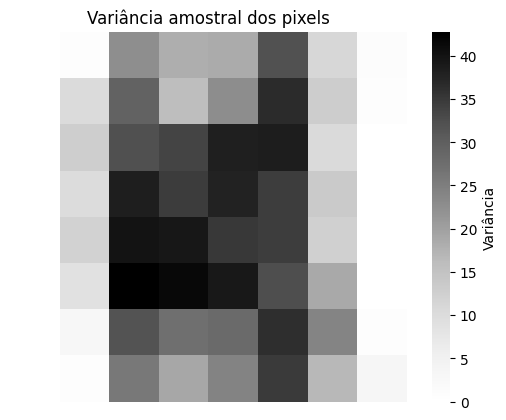

In [4]:
# Juntando os pontos de treino e de teste
all_points = np.vstack((mnist.features_train, mnist.features_test))

# Calculando a variância amostral
sample_variance = ((1/(all_points.shape[0] - 1)) * np.sum((all_points - all_points.mean(axis = 0))**2, axis = 0))
sample_variance = sample_variance.reshape((8, 8))

# Plotando a imagem da variância amostral como um heatmap
ax = sns.heatmap(sample_variance, cmap = "Greys", xticklabels = False, yticklabels = False)
ax.set_title("Variância amostral dos pixels")
ax.collections[0].colorbar.set_label("Variância")
plt.show()

Rótulo: 9 ; Predição: 4


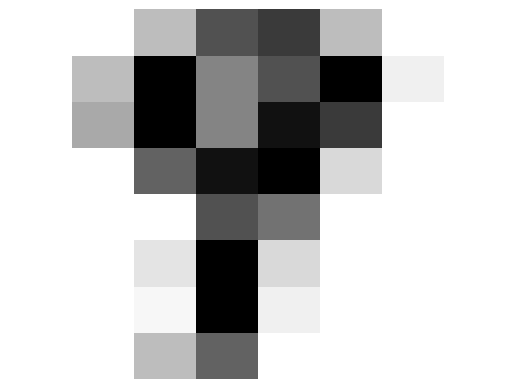

Rótulo: 9 ; Predição: 5


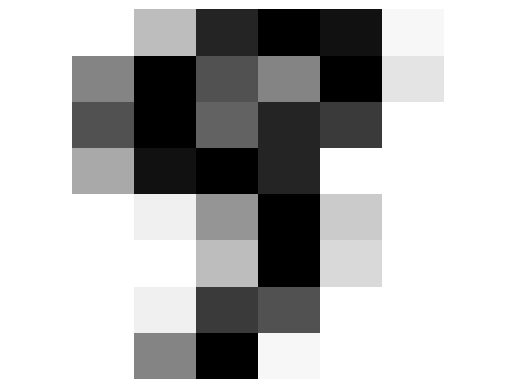

In [5]:
# Pegando os índices dos pontos classificados incorretamente pelo melhor modelo
wrong_classified = np.where([best_y_pred != mnist.labels_test])[1]

# Exibindo os rótulos verdadeiro e previsto e a imagem de cada um desses pontos
for wrong_index in wrong_classified:
    image = mnist.features_test[wrong_index].reshape((8, 8))
    sns.heatmap(image, cmap = "Greys", xticklabels = False, yticklabels = False, cbar = False)
    print("Rótulo:", mnist.labels_test[wrong_index], "; Predição:", best_y_pred[wrong_index])
    plt.show()

**Resposta:** Curiosamente, as duas imagens classificadas erroneamente são do dígito 9. Na primeira, classificada como um 4, podemos ver uma parte superior do círculo do 9 um pouco fraca e uma "perninha" não tão puxada para a esquerda, o que pode ter levado esse ponto a se aproximar mais dos números 4 (não dessa forma como é escrito pelo computador, mas da forma manuscrita). Já com relação à segunda imagem, classificada como um 5, não sei dizer porque esse ponto está mais próximo dos 5s do que dos 9s. Talvez o círculo um pouco pequeno?

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

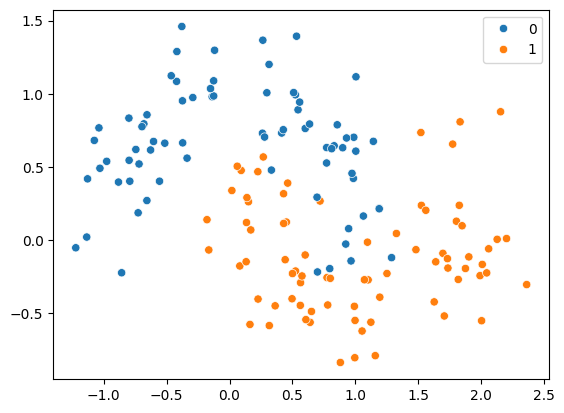

In [2]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

In [7]:
# Número de pontos de teste
n_of_test_points = moon.labels_test.shape[0]
# Salvando o melhor número de vizinhos
best_k = 0
# Salvando a melhor acurácia
best_accuracy = 0
# Salvando as melhores predições
best_y_pred = None

# Para cada número de vizinhos...
for k in range(1, 11):
    # Calcula as predições para o conjunto de teste
    y_pred = knn(moon.features_train, moon.labels_train, moon.features_test, k)
    # Calcula a acurácia
    accuracy = np.sum(y_pred == moon.labels_test)/n_of_test_points
    print("Número de vizinhos:", k, "; Acurácia:", accuracy)
    # Se for a melhor acurácia até agora, salva as variáveis
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_y_pred = y_pred

Número de vizinhos: 1 ; Acurácia: 0.94
Número de vizinhos: 2 ; Acurácia: 0.92
Número de vizinhos: 3 ; Acurácia: 0.92
Número de vizinhos: 4 ; Acurácia: 0.92
Número de vizinhos: 5 ; Acurácia: 0.92
Número de vizinhos: 6 ; Acurácia: 0.9
Número de vizinhos: 7 ; Acurácia: 0.94
Número de vizinhos: 8 ; Acurácia: 0.92
Número de vizinhos: 9 ; Acurácia: 0.94
Número de vizinhos: 10 ; Acurácia: 0.94


In [8]:
# Criando dados com todas as combinações de valores dos eixos
all_x = np.arange(-1.5, 2.5, 0.03)
all_y = np.arange(-1, 1.5, 0.03)

X, Y = np.meshgrid(all_x, all_y)
all_coordinates = np.column_stack([X.ravel(), Y.ravel()])

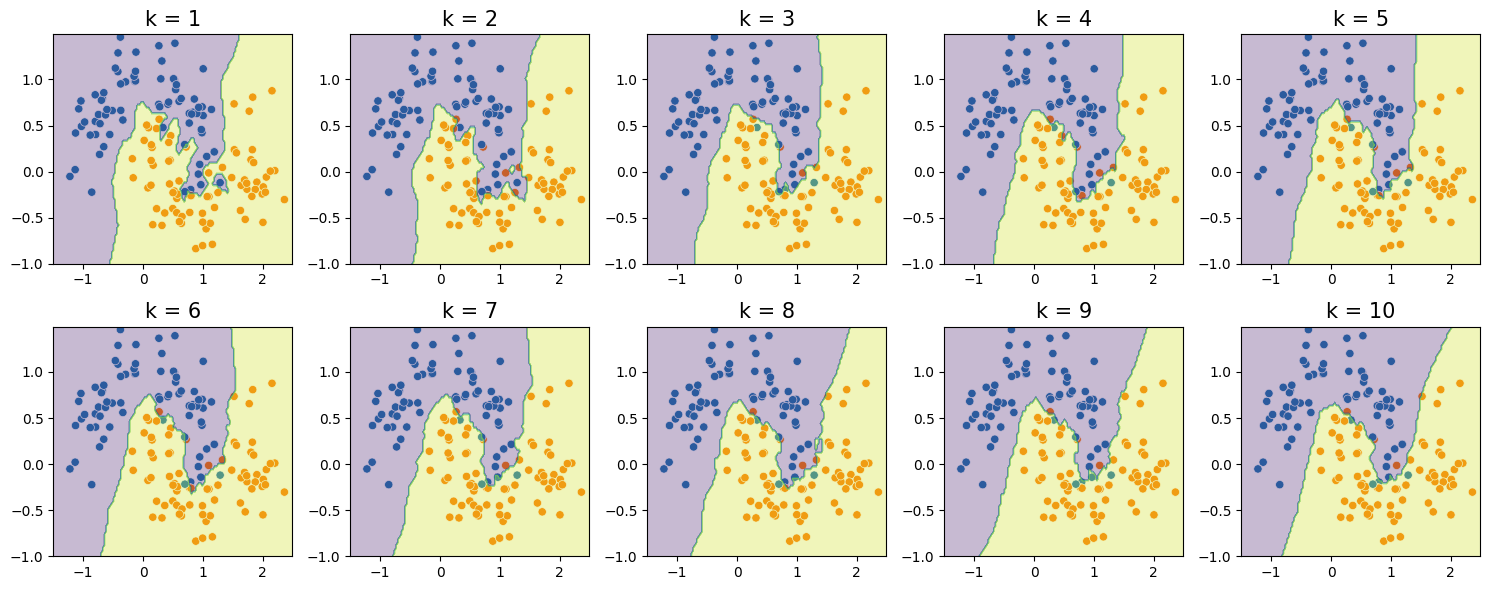

In [9]:
# Iniciando o subplots
fig, axes = plt.subplots(2, 5, figsize = (15, 6))

# Para cada valor de k...
for k in range(1, 11):
    # Calcula as predições para todas as coordenadas do gráfico
    all_y_preds = knn(moon.features_train, moon.labels_train, all_coordinates, k).reshape(X.shape)
    # Seta o subplot correto
    ax = axes[(k-1)//5, (k-1)%5]
    # Plota os dados
    sns.scatterplot(
        x = moon.features_train[:, 0],
        y = moon.features_train[:, 1],
        hue = moon.labels_train,
        ax = ax
    )
    # Plota a fronteira
    ax.contourf(X, Y, all_y_preds, alpha = 0.3)
    # Ajusta o gráfico
    ax.legend([], [], frameon = False)
    ax.set_title(f"k = {k}", fontsize = 15)

plt.tight_layout()
plt.show()

**Resposta:** Pode-se notar que, quanto maior a vizinhança definida, mais suave torna-se a fronteira de decisão. Isso se deve ao fato de que, com mais vizinhos participando da votação majoritária de decisão do rótulo de um ponto, mais trocas de vizinho são necessárias para que essa votação possa inverter-se e o rótulo escolhido possa mudar, fazendo com que um ponto precise "movimentar-se" mais para que isso aconteça, o que torna a fronteira mais regular.

# Regressão linear

**Exercício 1.** Deixamos à sua disposição o dataset ["California Housing"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), dividio em treino, teste e validação.
O modelo que você utilizará para aproximar a relação funcional entre as features e as labels é o modelo linear, i.e., $\mathbf{y} = X\theta$.
Entretanto, você deve estimar seus parâmetros (minimizando o *mean squared error*) com **dois algoritmos diferentes**.
Uma implementação deve estimar $\theta$ por meio de **Stochastic Gradient Descent (SGD)** e, a outra, por meio de **Ordinary Least Squares (OLS)**, ou seja, utilizar a solução em fórmula fechada vista em aula.

Para o SGD, o ponto inicial deve ser escolhido aleatoriamente e o algoritmo deve parar quando a norma da diferença entre duas estimativas consecutivas de $\theta$ for menor do que um $\varepsilon > 0$ previamente especificado.
Para o experimento a seguir, fixe $\varepsilon$ em um valor pequeno (por exemplo, alguma potência de $1/10$) para a qual o algoritmo convirja no máximo em alguns minutos para uma solução com perda pequena.

Para diferentes tamanhos de minibatch (por exemplo $\{2^{j}: 1 \leq j \leq 7\}$), plote um gráfico representando o valor da perda $ L(\hat{\theta}) = \frac{1}{n} \lVert X \hat{\theta} - \mathbf{y} \rVert^{2}$ no conjunto de validação em função do número de epochs. Mostre também o valor ótimo obtido com OLS. Comente os resultados e o efeito tamanho do mini-batch, e.g., no tempo de treinamento. Reporte valores nos conjuntos de treino, validação e teste.

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


SEED = 42
np.random.seed(SEED)


features, labels = fetch_california_housing(return_X_y=True)
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.25
)
features_train, features_validation, labels_train, labels_validation = train_test_split(
    features_train, labels_train, test_size=0.25
)

In [2]:
# Função para normalizar os dados
def normalize(X_main, other_X = None):
    # Calculando os valores de normalização com base no X_main
    mean = X_main.mean(axis = 0)
    std = np.std(X_main, axis = 0)

    # Normalizando o X_main
    normalized_X_main = (X_main - mean)/std

    # Se tiver outro X, normaliza ele
    if other_X is not None:
        normalized_other_X = (other_X - mean)/std
    else:
        normalized_other_X = None

    return normalized_X_main, normalized_other_X

# Função para calcular o theta do OLS e seus erros nos conjuntos de treino e teste passados
def OLS(X_train, y_train, X_test = None, y_test = None):
    # Normalizando os conjuntos de dados
    normalized_X_train, normalized_X_test = normalize(X_train, X_test)
    # Adicionando a coluna de bias ao conjunto de treino
    normalized_X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), normalized_X_train))

    # Calculando o theta do OLS
    theta = np.linalg.inv(normalized_X_train_with_bias.T @ normalized_X_train_with_bias) @ (normalized_X_train_with_bias.T @ y_train)

    # Calculando as predições para o conjunto de treino
    pred_train = normalized_X_train_with_bias @ theta
    # Calcunando o erro final no conjunto de treino
    final_train_error = (1/pred_train.size)*(np.linalg.norm(pred_train - y_train)**2)

    # Se tiver conjunto de teste...
    if X_test is not None:
        # Adiciona a coluna do bias
        normalized_X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), normalized_X_test))
        # Calcula suas predições
        pred_test = normalized_X_test_with_bias @ theta
        # Calcula o erro final
        final_test_error = (1/pred_test.size)*(np.linalg.norm(pred_test - y_test)**2)
    else:
        final_test_error = None

    return theta, final_train_error, final_test_error

In [ ]:
# Calculando o erro final do theta OLS do conjunto de validação
_, final_val_error_OLS, _ = OLS(features_validation, labels_validation)

In [4]:
# Função do SGD para regressão linear
def linear_regression_sgd(X_train, y_train, X_val_or_test, y_val_or_test, batch_size):
    # Normalizando os dados
    normalized_X_train, normalized_X_val_or_test = normalize(X_train, X_val_or_test)

    # Adicionando a coluna de 1s para o intercepto
    normalized_X_train = np.hstack((np.ones((normalized_X_train.shape[0], 1)), normalized_X_train))
    normalized_X_val_or_test = np.hstack((np.ones((normalized_X_val_or_test.shape[0], 1)), normalized_X_val_or_test))

    # Lista dos erros por época
    errors_history = []

    # Números de dados e de covariáveis
    n_of_points, n_of_features = normalized_X_train.shape

    # Inicializando o vetor de parâmetros como uma amostra Normal com baixa variância
    theta = np.random.normal(0, 0.001, n_of_features)

    # Matriz com X e y de treino
    Xy = np.hstack((normalized_X_train, y_train.reshape(-1, 1)))

    # Calculando o erro atual na validação e salvando-o na lista
    current_val_or_test_error = (1/normalized_X_val_or_test.shape[0])*np.linalg.norm(normalized_X_val_or_test @ theta - y_val_or_test)**2
    errors_history.append(current_val_or_test_error)
    
    # Iniciando a variação atual dos parâmetros
    current_variation = 1

    # Número da época atual
    epoch = 0

    # Enquanto a variação atual dos parâmetros for grande...
    while current_variation > 10**(-3):
        # Aumenta uma época
        epoch += 1

        # Embaralha os dados
        np.random.shuffle(Xy)
        # Separa de volta o X e o y
        X_shuffled = Xy[:, :-1]
        y_shuffled = Xy[:, -1]
        
        # Salva o vetor de parâmetros anterior
        previous_theta = theta.copy()

        # Contador das linhas de dados
        i = 0

        # Enquanto não acabarem os dados...
        while i + batch_size < n_of_points:
            # Pega o X e o y do batch atual
            X_current_batch = X_shuffled[i:i + batch_size, :]
            y_current_batch = y_shuffled[i:i + batch_size]
            # Calcula o gradiente
            grad = (2/batch_size)*(X_current_batch.T @ (X_current_batch @ theta - y_current_batch))
            # Atualiza o vetor de parâmetros
            theta -= 0.00001 * grad
            # Avança nos dados
            i += batch_size
            
        # Depois de finalizada a época, calcula o erro atual na validação e salva-o na lista
        current_val_or_test_error = (1/normalized_X_val_or_test.shape[0])*(np.linalg.norm(normalized_X_val_or_test @ theta - y_val_or_test)**2)
        errors_history.append(current_val_or_test_error)

        # Calcula a variação no vetor de parâmetros
        current_variation = np.linalg.norm(theta - previous_theta)

    # Calculando o erro final no conjunto de teste
    final_train_error = (1/n_of_points)*(np.linalg.norm(normalized_X_train @ theta - y_train)**2)

    return theta, errors_history, final_train_error, current_val_or_test_error

In [5]:
# Dicionário de resultados
reports = {}

# Executando o algoritmo e salvando seu relatório para cada tamanho de batch
for j in range(1, 8):
    print(f"Iniciando otimização com tamanho de batch {2**j}")
    _, errors_history, final_train_error, final_val_error = linear_regression_sgd(features_train,
                                                                                  labels_train,
                                                                                  features_validation,
                                                                                  labels_validation,
                                                                                  2**j)
    reports[j] = {"errors_history": errors_history,
                  "final_train_error": final_train_error,
                  "final_val_error": final_val_error}

Iniciando otimização com tamanho de batch 2
Iniciando otimização com tamanho de batch 4
Iniciando otimização com tamanho de batch 8
Iniciando otimização com tamanho de batch 16
Iniciando otimização com tamanho de batch 32
Iniciando otimização com tamanho de batch 64
Iniciando otimização com tamanho de batch 128


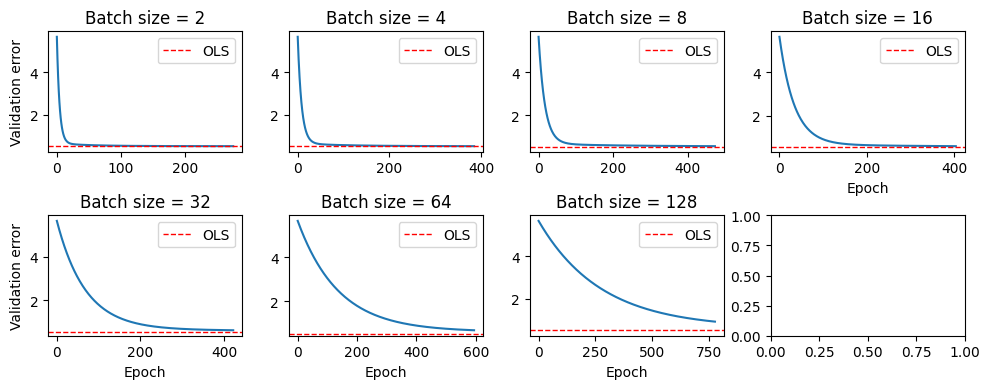

In [8]:
# Plotando os erros na validação em função das épocas
fig, axes = plt.subplots(2, 4, figsize = (10, 4))

for j in range(1, 8):
    ax = axes[(j-1)//4, (j-1)%4]
    ax.plot(reports[j]["errors_history"])
    ax.set_title(f"Batch size = {2**j}")
    ax.axhline(y = final_val_error_OLS, color = "red", linestyle = "--", linewidth = 1, label = "OLS")
    ax.legend()

axes[0, 0].set_ylabel("Validation error")
axes[1, 0].set_ylabel("Validation error")
axes[1, 0].set_xlabel("Epoch")
axes[1, 1].set_xlabel("Epoch")
axes[1, 2].set_xlabel("Epoch")
axes[0, 3].set_xlabel("Epoch")

plt.tight_layout()
plt.show()

In [9]:
# Exibindo os erros finais de teste e validação da etapa de seleção do hiperparâmetro j
for j in range(1, 8):
    print(f"Erros finais com tamanho de batch {2**j}")
    final_train_error = reports[j]["final_train_error"]
    final_val_error = reports[j]["final_val_error"]
    print(f"-- Treino:    {final_train_error}")
    print(f"-- Validação: {final_val_error}")

Erros finais com tamanho de batch 2
-- Treino:    0.5170432315003726
-- Validação: 0.5383198832348879
Erros finais com tamanho de batch 4
-- Treino:    0.5200465182874859
-- Validação: 0.5414632833795683
Erros finais com tamanho de batch 8
-- Treino:    0.5309202060980356
-- Validação: 0.551663539604927
Erros finais com tamanho de batch 16
-- Treino:    0.5709691680828686
-- Validação: 0.5894656087805238
Erros finais com tamanho de batch 32
-- Treino:    0.6164078708181487
-- Validação: 0.6303766129649346
Erros finais com tamanho de batch 64
-- Treino:    0.6877659447583676
-- Validação: 0.6961652789003442
Erros finais com tamanho de batch 128
-- Treino:    0.9347024853833313
-- Validação: 0.9352510358674527


In [10]:
# Pegando o j que gerou o menor erro na validação
final_val_errors = np.array([reports[j]["final_val_error"] for j in range(1, 8)])
best_j = np.argmin(final_val_errors) + 1

print("Melhor batch size:", 2**best_j)

# Juntando os dados de treino e validação
features_train_and_val = np.vstack((features_train, features_validation))
labels_train_and_val = np.vstack((labels_train.reshape(-1, 1), labels_validation.reshape(-1, 1))).ravel()

Melhor batch size: 2


In [11]:
# Treinando o modelo final nesses dados e testando no conjunto de teste
_, _, final_train_and_val_error_SGD, final_test_error_SGD = linear_regression_sgd(features_train_and_val,
                                                                                  labels_train_and_val,
                                                                                  features_test,
                                                                                  labels_test,
                                                                                  2**best_j)

In [12]:
# Calculando o theta pelo OLS do conjunto de treino e validação e seus erros nesse conjunto e no de teste
_, final_train_and_val_error_OLS, final_test_error_OLS = OLS(features_train_and_val,
                                                             labels_train_and_val,
                                                             features_test,
                                                             labels_test)

print("Erros finais no treino:")
print(f"-- SGD: {final_train_and_val_error_SGD}")
print(f"-- OLS: {final_train_and_val_error_OLS}")
print("Erros finais no teste:")
print(f"-- SGD: {final_test_error_SGD}")
print(f"-- OLS: {final_test_error_OLS}")

Erros finais no treino:
-- SGD: 0.5211708317327741
-- OLS: 0.5205522163645129
Erros finais no teste:
-- SGD: 0.5408677119085065
-- OLS: 0.5411287478470688


**Resposta:** A partir dos gráficos exibidos acima, notamos que tamanhos de batch menores levam o algoritmo a convergir mais rapidamente. Isso ocorre pois, com menos dados em cada batch, mais atualizações ocorrem no vetor de parâmetros a cada época (número de atualizações por época = total de dados/tamanho do batch), levando-o a convergir de forma mais rápida, apesar de essas atualizações poderem ser instáveis, já que o gradiente é calculado com base em poucos pontos. Enquanto isso, com tamanho maiores de batch, temos menos atualizações em cada época e, consequentemente, o algoritmo precisa de mais épocas para convergir. No entanto, nesse caso, essas atualizações são mais estáveis, dado que o cálculo do gradiente leva em consideração mais dados.

Além disso, obtemos erros nos conjuntos de treino e validação menores com batches menores. Isso se deve ao fato de que a verificação da variação do vetor de parâmetros ocorre apenas ao final de uma época. Assim, com batches menores, como temos mais iterações dentro de uma época, logo após essa variação efetivamente alcançar o nível desejado, o algoritmo provavelmente ainda vai executar algumas iterações antes de detectar isso, levando-o a locais com erros ainda menores.

Por fim, notamos que, no conjunto de treino, o erro do SGD ficou bem próximo do erro do OLS, que é o menor possível. Por outro lado, no conjunto de teste, o SGD acabou superando o OLS em desempenho. Apesar de estranho, isso é normal, dado que o OLS apresenta o melhor resultado no conjunto em que foi treinado, e não necessariamente em outros conjuntos de dados.

**Exercício 2.** Agora, você deve implementar uma **Rede RBF** com função de base Gaussiana (veja as notas de aula).
Para os centróides, utilize o output de um modelo de clusterização por K médias, por meio da função que disponibilizamos, como a seguir:

In [4]:
def k_means_factory(n_clusters: int) -> KMeans:
    return KMeans(n_clusters=n_clusters, n_init="auto")

k_means_model = k_means_factory(n_clusters=2)
dumb_data = np.array(
    [[1, 2],
     [1, 4],
     [1, 0],
     [10, 2],
     [10, 4],
     [10, 0]]
)
k_means_model.fit(dumb_data)
cluster_centers = k_means_model.cluster_centers_
print(cluster_centers) # Shape (n_clusters, n_features)

[[10.  2.]
 [ 1.  2.]]


Para determinar o melhor valor de $k$ para o algoritmo de clusterização, treine o modelo (usando a fórmula de OLS) com diferentes valores e escolha o que possuir o menor erro de validação. Faça um gráfico mostrando o valor do erro de validação para diferentes valores de $k$. Mostre também a performance do modelo escolhido no conjunto de teste. Compare com o modelo linear simples da questão anterior. Discuta os resultados.

Para definir o valor do hiper-parâmetro $\gamma$, use a seguinte heurística --- que pode ser achado no livro "Neural Networks", por Simon Haykin:

$$
\gamma = \frac{1}{d_\text{max}^2},
$$

onde $d_\text{max}$ é a maior distância entre um par de centróides. Note que o valor costuma mudar para $k$'s diferentes.


In [126]:
# Função para inserir a coluna do bias em um conjunto de dados
def insert_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

# Função para calcular as distâncias ao quadrado entre as linhas de duas matrizes
def squared_distances(X1, X2):
    aux1 = np.diag(X1 @ X1.T).reshape((-1, 1)) @ np.ones((1, X2.shape[0]))
    aux2 = -2 * X1 @ X2.T
    aux3 = np.ones((X1.shape[0], 1)) @ np.diag(X2 @ X2.T).reshape((1, -1))

    return aux1 + aux2 + aux3

# Função para calcular as funções de base radial de um conjunto de dados
def radial_base_function(X, centers, gamma):
    norms = squared_distances(X, centers)
    return np.exp(-gamma * norms)

# Função da rede RBF
def rbf(X_train, y_train, X_test, y_test, k):
    # Pegando os centróides
    k_means_model = k_means_factory(k)
    k_means_model.fit(X_train)
    cluster_centers = k_means_model.cluster_centers_

    # Calculando as distâncias entre os centróides
    squared_centers_distances = squared_distances(cluster_centers, cluster_centers)
    # Calculando o gamma com base na distância máxima entre os centróides
    gamma = 1/np.max(squared_centers_distances)

    # Calculando as funções de base dos conjuntos de treino e de teste
    X_train_bf = radial_base_function(X_train, cluster_centers, gamma)
    X_test_bf = radial_base_function(X_test, cluster_centers, gamma)

    # Normalizando esses conjuntos
    normalized_X_train_bf, normalized_X_test_bf = normalize(X_train_bf, X_test_bf)
    
    # Adicionando as colunas de bias
    normalized_X_train_bf_with_bias = insert_bias(normalized_X_train_bf)
    normalized_X_test_bf_with_bias = insert_bias(normalized_X_test_bf)

    # Calculando o theta do OLS
    theta = np.linalg.pinv(normalized_X_train_bf_with_bias.T @ normalized_X_train_bf_with_bias) @ (normalized_X_train_bf_with_bias.T @ y_train)

    # Calculando os erros nos conjuntos de treino e de teste
    final_train_error = (1/y_train.size)*(np.linalg.norm(normalized_X_train_bf_with_bias @ theta - y_train)**2)
    final_test_error = (1/y_test.size)*(np.linalg.norm(normalized_X_test_bf_with_bias @ theta - y_test)**2)

    return theta, final_train_error, final_test_error

In [130]:
# Lista para salvar os erros de validação de cada k
ks = []
validation_errors = []

# Para cada número de funções de base
for k in [2**j for j in range(1, 11)]:
    # Executa o modelo e pega o erro na validação
    _, _, validation_error = rbf(features_train, labels_train, features_validation, labels_validation, k)
    # Salva na lista
    ks.append(k)
    validation_errors.append(validation_error)

# Pegando o k com menor erro de validação
best_k = ks[np.argmin(validation_errors)]
print("Melhor k:", best_k, "; erro: na validação:", np.min(validation_errors))

Melhor k: 64 ; erro: na validação: 0.6772264004022741


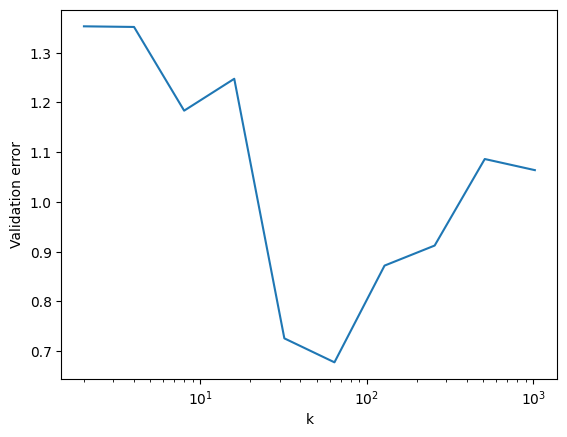

In [139]:
plt.plot(ks, validation_errors)
plt.xscale("log")
plt.xlabel("k")
plt.ylabel("Validation error")
plt.show()

In [149]:
# Executando o modelo com o melhor k e no conjunto de treino + validação
_, train_and_val_error_RBF, test_error_RBF = rbf(features_train_and_val,
                                                 labels_train_and_val,
                                                 features_test,
                                                 labels_test,
                                                 best_k)

print("Erros no conjunto de treino:")
print("-- Rede RBF:        ", train_and_val_error_RBF)
print("-- Regressão linear:", final_train_and_val_error_OLS)
print("Erros no conjunto de teste:")
print("-- Rede RBF:        ", test_error_RBF)
print("-- Regressão linear:", final_test_error_OLS)

Erros no conjunto de treino:
-- Rede RBF:         0.6511076664318411
-- Regressão linear: 0.5205522163645129
Erros no conjunto de teste:
-- Rede RBF:         0.6366360918121831
-- Regressão linear: 0.5411287478470688


**Resposta:** Notamos que valores intermediários para o número de funções de base são mais adequados, o que faz sentido, dado que poucas dimensões não conseguem capturar de forma eficiente as características dos dados e muitas dimensões acabam levando ao sobreajuste e, portanto, a erros maiores no conjunto de validação.

Agora, com relação aos desempenhos obtidos, temos que a rede RBF conseguiu alcançar um desempenho bem próximo da regressão linear simples, mas ainda um pouco abaixo dessa. Isso provavelmente ocorreu porque os padrões presentes nesses dados podem ser melhor explicados por um modelo linear do que por um modelo com funções de base radiais.

## Regressão logística

O pedaço de código abaixo carrega o banco de dados 'breast cancer' e adiciona uma coluna de bias. Além disse, ele o particiona em treino e teste.

1. Implemente a estimativa de máximo a posteriori para um modelo de regressão logística com priori $\mathcal{N}(0, c I)$ com $c=100$ usando esse banco de dados;
2. Implemente a aproximação de Laplace para o mesmo modelo;
3. Implemente uma aproximação variacional usando uma Gaussiana diagonal e o truque da reparametrização;
4. Calcule a accuracy no teste para todas as opções acima --- no caso das 2 últimas, a prob predita é $\int_\theta p(y|x, \theta) q(\theta)$;
5. Para cada uma das 3 técnicas, plote um gráfico com a distribuição das entropias para as predições corretas e erradas (separadamente), use a função kdeplot da biblioteca seaborn.
6. Comente os resultados, incluindo uma comparação dos gráficos das entropias.

Explique sua implementação também! 

Para (potencialmente) facilitar sua vida: use PyTorch, Adam como otimizador (é uma variação SGD) com lr=0.001, use o banco de treino inteiro ao invés de minibatchces, use binary_cross_entropy_with_logits para implementar a -log verossimilhança, use torch.autograd.functional para calcular a Hessiana. Você pode usar as bibliotecas importadas na primeira célula a vontade. Verifique a documentação de binary_cross_entropy_with_logits para garantir que a sua priori está implementada corretamente, preservando as proporções devidas. Use 10000 amostras das aproximações para calcular suas predições.

In [4]:
import torch
from sklearn.datasets import load_breast_cancer

In [8]:
data =  load_breast_cancer()
N = len(data.data)
Ntrain = int(np.ceil(N*0.6))
perm = np.random.permutation(len(data.data))
X = torch.tensor(data.data).float()
X = torch.cat((X, torch.ones((X.shape[0], 1))), axis=1) 
y = torch.tensor(data.target).float()

Xtrain, ytrain = X[perm[:Ntrain]], y[perm[:Ntrain]]
Xtest, ytest = X[perm[Ntrain:]], y[perm[Ntrain:]]

### Parte 1

Primeiramente, implementamos uma função para calcular o valor da log-posteriori abaixo dado um valor de $\theta$:

$$
\log p(\theta | D) \propto \log p(D | \theta) + \log p(\theta)
$$

Como a log-verossimilhança negativa da Bernoulli é a entropia cruzada binária, utilizamos essa função do `torch` negativada para calcular nossa log-verossimilhança. Em seguida, para calcular a parcela da priori, apenas implementamos o cálculo da log-PDF Normal multivariada:

$$
\theta \sim N(0, cI) \Longrightarrow \log p(\theta) \propto -\dfrac{1}{2c} \theta ^T \theta
$$

In [5]:
import torch.nn.functional as F

# Função para calcular o valor da log-posteriori para um dado theta
def log_posteriori(Xtrain, ytrain, c, theta):
    # Parcela da log-verossimilhança como o negativo da entropia cruzada binária
    log_likelihood = -F.binary_cross_entropy_with_logits(Xtrain @ theta, ytrain)
    # Parcela da priori como o log da PDF da Normal multivariada
    log_priori = -1/(2*c) * theta.T @ theta
    
    return log_likelihood + log_priori

Feito isso, inicializamos nosso vetor de parâmetros com uma distribuição Normal com baixa variância. Se o inicializarmos baseado na priori, ou seja, com variância 100, o algoritmo não consegue otimizá-lo, provavelmente devido aos altos valores. Por fim, utilizamos o otimizador Adam do `torch` para aproximar o $\theta$ que maximiza nossa log-posteriori.

In [6]:
# Função para calcular o MAP de theta
def MAP(Xtrain, ytrain, c):
    # Inicializando theta
    theta = torch.normal(mean = 0, std = 0.001, size = (Xtrain.shape[1],), requires_grad = True)

    # Inicializando o otimizador
    optimizer = torch.optim.Adam([theta], lr = 0.001, maximize = True)

    # Otimizando theta
    for _ in range(5000):
        optimizer.zero_grad()
        loss = log_posteriori(Xtrain, ytrain, c, theta)
        loss.backward()
        optimizer.step()

    return theta

In [10]:
# Variância da priori
c = 100
# Calculando o MAP de theta
theta_MAP = MAP(Xtrain, ytrain, c)

print("Probabilidade a posteriori:", np.exp(log_posteriori(Xtrain, ytrain, c, theta_MAP).item()))

Probabilidade a posteriori: 0.8704968466825462


Portanto, obtemos uma probabilidade a posteriori de aproximadamente 0.88, o que parece bem razoável.

### Parte 2

Para implementar o método da aproximação de Laplace, precisamos definir nossa distribuição aproximada $q(\theta)$ da seguinte forma:

$$
q(\theta) \sim N(m, H^{-1}),
$$

onde $m$ é a moda da posteriori e $H$ é a matriz hessiana do logaritmo negativo da posteriori avaliada na moda.

Para calcular $m$, podemos simplesmente utilizar o método implementado na parte anterior da estimativa por máximo a posteriori. Já com relação à matriz $H$, podemos aplicar o método de cálculo de hessianas do `torch`, `torch.autograd.functional.hessian`, sobre o negativo da função já definida anteriormente que retorna o valor da log-posteriori (a menos de constantes) em um dado $\theta$. Com isso, temos a distribuição da posteriori por aproximação de Laplace.

In [11]:
from torch.autograd.functional import hessian

# Função para calcular a aproximação de Laplace da posteriori de theta
def laplace(Xtrain, ytrain, c):
    # Calculando a moda da posteriori como o estimador MAP
    mode = MAP(Xtrain, ytrain, c)
    # Calculando a hessiana da log-posteriori negativa avaliada na moda
    H = hessian(lambda theta: -log_posteriori(Xtrain, ytrain, c, theta), mode)
    # Invertendo ela e garantindo sua simetria
    H_inv = torch.linalg.inv(H)
    H_inv = 0.5 * (H_inv + H_inv.T)

    # Definindo o theta como tendo uma distribuição Normal multivariada com a média
    # sendo a moda calculada e matriz de covariância sendo a Hessiana calculada
    theta = torch.distributions.MultivariateNormal(mode, H_inv)

    return theta

In [12]:
# Calculando a distribuição do theta de acordo com a aproximação de Laplace
theta_laplace = laplace(Xtrain, ytrain, c)

### Parte 3

Para implementar esse último método, primeiramente, vamos definir uma função que calcula a distância de Kullback-Leibler (a menos de constantes) entre nossa distribuição aproximada e a posteriori verdadeira. Para isso, utilizamos da seguinte relação:

$$
\begin{align*}

D_{KL}(q(\theta) || p(\theta|D)) &= \mathbb{E}_{\theta \sim q}\left[\log \dfrac{q(\theta)}{p(\theta|D)}\right] \\
                                 &= \mathbb{E}_{\theta \sim q}[\log q(\theta)] - \mathbb{E}_{\theta \sim q}[\log p(\theta|D)] \\
                                 &= \mathbb{E}_{\theta \sim q}[\log q(\theta)] - \mathbb{E}_{\theta \sim q}\left[\log \dfrac{p(D|\theta)p(\theta)}{p(D)}\right] \\
                                 &= \mathbb{E}_{\theta \sim q}[\log q(\theta)] - \mathbb{E}_{\theta \sim q}[\log p(D|\theta)] - \mathbb{E}_{\theta \sim q}[\log p(\theta)] + \mathbb{E}_{\theta \sim q}[\log p(D)] \\
                                 &= \mathbb{E}_{\theta \sim q}[\log q(\theta)] - \mathbb{E}_{\theta \sim q}[\log p(D|\theta)] - \mathbb{E}_{\theta \sim q}[\log p(\theta)] + constante

\end{align*}
$$

Portanto, podemos calcular essa distância, ignorando as constantes, como a esperança do logaritmo da distribuição aproximada substraída da esperança da log-verossimilhança e da esperança da log-priori.

Dessa forma, abaixo temos a definição de uma função que, dados os parâmetros das distribuições Normais da priori e da aproximada, os dados para o cálculo da verossimilhança e um certo $\theta$ fixo (ou uma matriz de $\theta$'s fixos), retorna o valor dessa distância.

In [13]:
# Função para calcular a distância KL entre as duas Normais avaliada em um theta
def loss_Dkl(theta, mu_q, mu_priori, sigma_q, sigma_priori, Xtrain, ytrain):
    # Parcela do log da distribuição de aproximação
    log_q = torch.distributions.MultivariateNormal(mu_q, sigma_q).log_prob(theta.T)
    # Parcela da log-verossimilhança
    logits = Xtrain @ theta
    log_likelihood = -F.binary_cross_entropy_with_logits(logits, ytrain.unsqueeze(1).expand_as(logits), reduction="none")
    log_likelihood = log_likelihood.sum(dim=0)
    # Parcela da log-priori
    log_priori = torch.distributions.MultivariateNormal(mu_priori, sigma_priori).log_prob(theta.T)

    return log_q - log_likelihood - log_priori

A seguir, implementamos o método da aproximação variacional. Para isso, definimos a priori como uma Normal da forma determinada anteriormente e inicializamos a distribuição aproximada como uma Normal de média amostrada de uma Normal com média 0 e variância pequena e de variância sendo uma matriz diagonal cujos valores foram amostrados de uma Normal com média 0 e variância pequena e depois exponenciados para ficarem positivos e com média 1.

Após isso, queremos minimizar a distância entre a distribuição aproximada e a posteriori, calculada como mostrado acima. Para isso, utilizamos o otimizador Adam do `torch`. A cada iteração, realizamos 50 amostragens da distribuição aproximada atual do $\theta$ amostrando inicialmente de uma Normal padrão e em seguida multiplicando pelo desvio-padrão dessa distribuição e somando sua média (essa é a etapa de reparametrização, que faz com que o processo se torne diferenciável, já que amostrar diretamente da distribuição não seria diferenciável nos parâmetros). Assim, utilizamos essas amostras para aproximar, por um método de Monte Carlo, a esperança da definição da distância KL, calculando a distância relacionada a cada $\theta$ amostrado e tirando a média dessas distâncias. Depois da otimização, retornamos um $\theta$ com a distribuição aproximada calculada.

In [14]:
# Função para calcular theta por aproximação variacional
def variational_approximation(Xtrain, ytrain, c):
    # Número de features
    n_of_features = Xtrain.shape[1]
    # Número de thetas a serem amostrados de q em cada iteração
    M = 50

    # Parâmetros da priori
    mu_priori = torch.normal(mean = 0, std = 0.001, size = (n_of_features,))
    sigma_priori = c * torch.eye(n_of_features)

    # Inicialização dos parâmetros da q
    mu_q = torch.normal(mean = 0, std = 0.001, size = (n_of_features,), requires_grad = True)
    sigma_q = torch.exp(torch.randn(n_of_features) * 0.001).requires_grad_()

    # Inicializando o otimizador
    optimizer = torch.optim.Adam([mu_q, sigma_q], lr = 0.001)

    # Otimizando theta
    for _ in range(5000):
        optimizer.zero_grad()
        # Reiniciando a perda
        loss = 0

        # Matrizes para a aplicação dos parâmetros aos thetas
        Sigma_q = torch.diag(sigma_q)
        Mu_q = mu_q.reshape((-1, 1)) @ torch.ones(M).reshape((1, -1))

        # Amostrando os thetas de q
        thetas =  Sigma_q @ torch.normal(mean = 0, std = 1, size = (n_of_features, M)) + Mu_q

        # Por Monte Carlo, calcula a perda como a médias das perdas para cada theta amostrado
        loss = loss_Dkl(thetas, mu_q, mu_priori, Sigma_q, sigma_priori, Xtrain, ytrain).mean()

        loss.backward()
        optimizer.step()

    # Gerando o theta final
    theta = torch.distributions.MultivariateNormal(mu_q, torch.diag(sigma_q))

    return theta

In [15]:
# Calculando a distribuição do theta de acordo com a aproximação variacional
theta_VA = variational_approximation(Xtrain, ytrain, c)

### Parte 4

Para calcular as acurácias dos 2 últimos métodos, definimos abaixo uma função para calcular a predição por meio do método de posteriori preditiva. Para isso, dados os dados de teste e a distribuição do $\theta$, essa função amostra 10000 valores para $\theta$ dessa distribuição, calcula as predições com base em cada $\theta$ por meio da sigmoide dos logits e calcula a probabilidade de cada um desses $\theta$'s na distribuição de onde foram amostrados. Com isso, a predição final é calculada como a média das predições de cada $\theta$ ponderada pela probabilidade de cada um desses $\theta$'s.

In [16]:
# Função para calcular a predição por posteriori preditiva
def predictive_posterior(Xtest, theta):
    # Amostrando os thetas
    thetas = theta.sample((10000, )).T
    # Calculando as predições de acordo com cada theta
    predictions = torch.sigmoid(Xtest @ thetas)
    # Calculando as probabilidades de cada theta na distribuição
    thetas_probabilities = torch.exp(theta.log_prob(thetas.T))
    
    # Fazendo a média ponderada das predições
    final_prediction = (predictions @ thetas_probabilities) / torch.sum(thetas_probabilities)
    
    # Retorna rótulos 0 ou 1
    return final_prediction

A seguir, estão os cálculos das predições e das acurácias de cada modelo.

In [64]:
# Número de pontos de teste
n_of_test_points = ytest.numel()

# Probabilidades, predição e acurácia do modelo com MAP
probabilities_MAP = torch.sigmoid(Xtest @ theta_MAP)
prediction_MAP = probabilities_MAP >= 0.5
accuracy_MAP = torch.sum(prediction_MAP == ytest)/n_of_test_points

# Probabilidades, predição e acurácia do modelo com aproximação de Laplace
probabilities_laplace = predictive_posterior(Xtest, theta_laplace)
prediction_laplace = probabilities_laplace >= 0.5
accuracy_laplace = torch.sum(prediction_laplace == ytest)/n_of_test_points

# Probabilidades, predição e acurácia do modelo com aproximação variacional
probabilities_VA = predictive_posterior(Xtest, theta_VA)
prediction_VA = probabilities_VA >= 0.5
accuracy_VA = torch.sum(prediction_VA == ytest)/n_of_test_points

print("Acurácias")
print("-- MAP:    ", accuracy_MAP.item())
print("-- Laplace:", accuracy_laplace.item())
print("-- VA:     ", accuracy_VA.item())

Acurácias
-- MAP:     0.9559471607208252
-- Laplace: 0.9559471607208252
-- VA:      0.9383260011672974


### Parte 5

Abaixo temos a função para a plotagem das entropias, na qual calculamos a entropia de cada ponto dadas as probabilidades preditas e as separamos de acordo com a corretude da predição de cada ponto.

In [65]:
# Função para plotar os gráficos das entropias
def plot_entropies(probabilities, ytest, title):
    # Calculando as entropias de cada entrada
    entropies = -probabilities * torch.log(probabilities) - (1 - probabilities) * torch.log(1 - probabilities)
    # Separando as entropias em dados classificados correta e incorretamente
    correct_entropies = entropies[(probabilities >= 0.5) == ytest].detach().numpy()
    wrong_entropies = entropies[(probabilities >= 0.5) != ytest].detach().numpy()
    
    plt.figure(figsize = (6, 4))

    # Plotando o gráfico
    sns.kdeplot(correct_entropies, label = "Correct")
    sns.kdeplot(wrong_entropies, label = "Wrong")

    plt.title(title)
    plt.xlabel("Entropy")
    plt.xlim((-0.25, 0.95))
    plt.legend()
    plt.show()

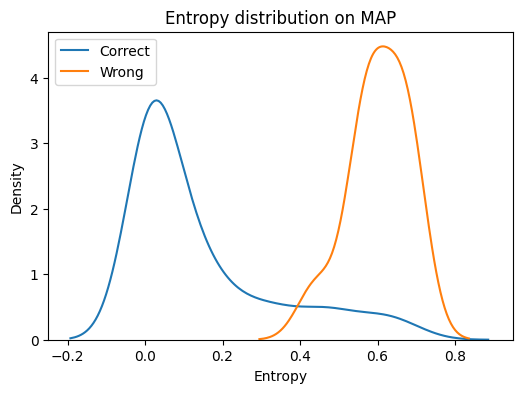

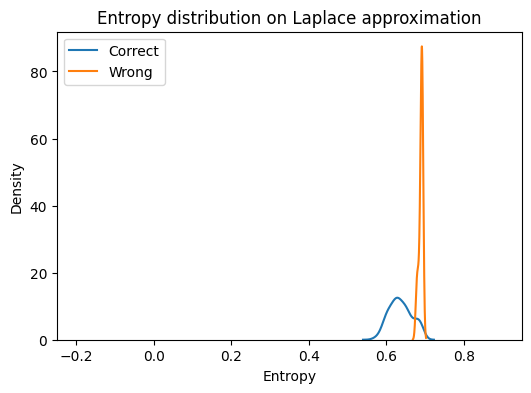

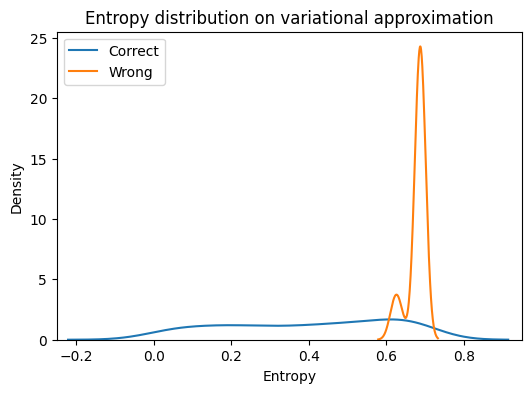

In [66]:
plot_entropies(probabilities_MAP, ytest, "Entropy distribution on MAP")
plot_entropies(probabilities_laplace, ytest, "Entropy distribution on Laplace approximation")
plot_entropies(probabilities_VA, ytest, "Entropy distribution on variational approximation")

### Parte 6

Vemos que todos os modelos alcançaram resultados relativamente bons, com uma média de 95% de acurácia!

No entanto, vale ressaltar que a acurácia estimada dos 2 últimos modelos pode variar levemente dependendo da execução do programa, dado que seu cálculo apresenta componentes aleatórias no uso da posteriori preditiva (e a estimativa por aproximação variacional também é aleatória na amostragem dos $\theta$'s para o cálculo por Monte Carlo das esperanças da distância KL).

Agora, com relação às curvas de entropia:

- No método de máximo a posteriori, temos baixa entropia para dados classificados corretamente e alta entropia para dados classificados incorretamente. Isso significa que, para a maioria dos dados classificados corretamente, o modelo tem relativa certeza de sua predição, enquanto que, para os dados classificados incorretamente, ele apresenta uma certa "dúvida", ou seja, não possui tanta certeza do rótulo ao qual está atribuindo esses dados. E isso é positivo, já que seria pior se ele tivesse certeza dos rótulos que está atribuindo erroneamente.
- No modelo de aproximação de Laplace, temos alta entropia para ambos os tipos de dados. Para os classificados incorretamente, isso é bom, como explicado no item anterior. No entanto, isso é um problema para os dados classificados corretamente, pois indica que o modelo não tem muita certeza de nenhum dos rótulos que está atribuindo (as probabilidades preditas são próximas de 0.5).
- No método de aproximação variacional, temos alta entropia para os dados classificados incorretamente (o que é positivo) e uma entropia relativamente distribuída entre os possíveis valores para os classificados corretamente. Dessa forma, podemos afirmar que esse modelo está com um desempenho entre os desempenhos dos dois modelos anteriores: apresenta certeza na predição para alguns dados que classificou corretamente, mas incerteza para outros.

Portanto, após essas análises, podemos concluir que o modelo que apresentou melhor desempenho foi o de máximo a posteriori, seguindo pelo de aproximação variacional e por fim pelo de aproximação de Laplace.